In [1]:
import json
import os
from library_dicom.dicom_processor.model.Series import Series 
from library_dicom.dicom_processor.model.SeriesPT import SeriesPT
from library_dicom.dicom_processor.model.SeriesCT import SeriesCT
from library_dicom.dicom_processor.model.csv_reader.MaskBuilder import MaskBuilder

from library_dicom.dicom_processor.tools.folders import *

from library_dicom.dicom_processor.tools.create_mip import *
from library_dicom.dicom_processor.tools.threshold_mask import *

import numpy as np
import SimpleITK as sitk

import csv

In [2]:
json_path = '/media/salim/DD 2To/GAINED_NIFTI/json/dataset_1.json'
dataset_1 = []
with open(json_path) as json_file : 
    reader = json.load(json_file)
    for info in reader :
        dataset_1.append(info)

print(len(dataset_1))

140


In [3]:
#index
coronal = [8]
error = [80, 135]
false_mask = [13, 14, 17, 18, 19, 39, 42, 47, 48, 51, 53, 54, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 69, 74, 76, 86, 88, 97, 100, 108, 111, 112, 113, 115, 117, 119, 122, 124, 128, 132, 133, 134, 136, 137, 138, 139]
print(len(false_mask))

46


In [4]:

good = [5, 10, 12,14, 16, 17, 18, 22, 25, 26, 28,29, 30, 31, 32, 33, 38, 39, 40, 41, 42, 45]
false_mask[45]

139

In [5]:
print(len(good))
data = []
for i in good : 
    data.append(false_mask[i])


for index in data : 
    false_mask.remove(index)

print(len(false_mask))


22
24


In [6]:
serie_mip = []
for index in false_mask : 
    serie_mip.append(dataset_1[index])

In [7]:
serie_mip[0]

['/media/salim/DD 2To/GAINED_Validated_DICOMS/11011101021014/1.2.250.1.59.470.940100027.1.20150506103428.19543.15731/1.2.840.113704.1.111.3984.1430907607.8/1.2.840.113704.1.111.3984.1430907607.8',
 'CT',
 '/media/salim/DD 2To/GAINED_Validated_DICOMS/11011101021014/1.2.250.1.59.470.940100027.1.20150506103428.19543.15731/1.3.46.670589.28.2.10.4.9167.27921.2.2240.0.1430909735/1.3.46.670589.28.2.10.4.9167.27921.2.2240.0.1430909735',
 'PT',
 'review96.csv',
 '11011101021014',
 'patient_11011101021014_PET_0_review_399_41.csv']

0


OSError: [Errno 28] No space left on device

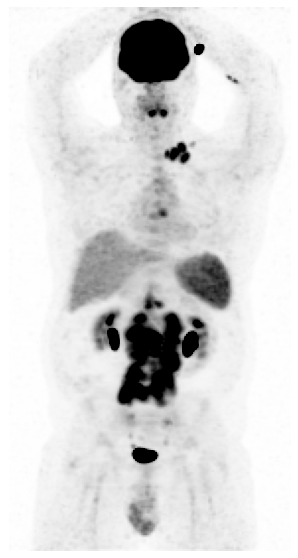

In [10]:
mip_directory = '/media/salim/DD 2To/GAINED_MIP'
csv_directory = '/media/salim/DD 2To/GAINED_CSV_DATA/Export_Gained/CSV41/PET0'

mask_false = []

for serie in serie_mip: 
        print(serie_mip.index(serie))
        if serie[1] == 'PT' : 
                serie_pt_objet = SeriesPT(serie[0])
                
                nifti_array = serie_pt_objet.get_numpy_array()

                study_uid = serie_pt_objet.get_series_details()['study']['StudyInstanceUID']

                angle_filename = mip_projection(nifti_array, 0, mip_directory, study_uid, borne_max = 5.0)             #mip.png PET
            

                size_matrix = serie_pt_objet.get_size_matrix()
                mask_objet = MaskBuilder(os.path.join(csv_directory, serie[6]), size_matrix)
                mask_4D = mask_objet.mask_array

                if mask_objet.is_correct_suv(nifti_array) == True : #si mask correct 
                        print("MASK CORRECT")
                        #generation nifti PT
                        filename_pt = study_uid+'_'+'nifti_'+'PT'+'.nii'
                        serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_pt))
                        print("EXPORT NIFTI PT")
                        #generation nifti CT
                        serie_ct_objet = SeriesCT(serie[2])
                        serie_ct_objet.get_numpy_array()
                        filename_ct = study_uid+'_'+'nifti_'+'CT'+'.nii'
                        serie_ct_objet.export_nifti(os.path.join(nifti_directory, filename_ct))
                        print("EXPORT NIFTI CT")
                        #generation nifti mask
                        filename_mask = study_uid+'_'+'nifti_'+'mask'+'.nii'
                        serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_mask), mask_4D)
                        print("EXPORT NIFTI MASK")
                else : 
                        print("FALSE MASK")
                        mask_false.append(serie)


                #number_roi = mask_4D.shape[3]
                #threshold = mask_objet.details_rois['SUVlo']
                        #seuillage
                #mask_4D = threshold_mask(mask_4D, mask_objet.details_rois, nifti_array)
                #angle_filename_mask = mip_projection_4D(mask_4D, 0, mip_directory, study_uid, number_roi, borne_max = 1.0)
                        print(mask_objet.calcul_suv(nifti_array))
                        print(mask_objet.ecart_suv_max(nifti_array))
                        print(mask_objet.ecart_suv_mean(nifti_array))
                        print(mask_objet.ecart_SD(nifti_array))
                
                        #mip.png MASK
        else  : 
                serie_pt_objet = SeriesPT(serie[2])

                nifti_array = serie_pt_objet.get_numpy_array()

                study_uid = serie_pt_objet.get_series_details()['study']['StudyInstanceUID']
 
                angle_filename = mip_projection(nifti_array, 0, mip_directory, study_uid, borne_max = 5.0)             #mip.png PET


                size_matrix = serie_pt_objet.get_size_matrix()
                mask_objet = MaskBuilder(os.path.join(csv_directory, serie[6]), size_matrix)
                mask_4D = mask_objet.mask_array

                if mask_objet.is_correct_suv(nifti_array) == True : #si mask correct 
                        print("MASK CORRECT")
                        #generation nifti PT
                        filename_pt = study_uid+'_'+'nifti_'+'PT'+'.nii'
                        serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_pt))
                        print("EXPORT NIFTI PT")
                        #generation nifti CT
                        serie_ct_objet = SeriesCT(serie[2])
                        serie_ct_objet.get_numpy_array()
                        filename_ct = study_uid+'_'+'nifti_'+'CT'+'.nii'
                        serie_ct_objet.export_nifti(os.path.join(nifti_directory, filename_ct))
                        print("EXPORT NIFTI CT")
                        #generation nifti mask
                        filename_mask = study_uid+'_'+'nifti_'+'mask'+'.nii'
                        serie_pt_objet.export_nifti(os.path.join(nifti_directory, filename_mask), mask_4D)
                        print("EXPORT NIFTI MASK")
                else : 
                        print("FALSE MASK")
                        mask_false.append(serie)


                #number_roi = mask_4D.shape[3]
                #threshold = mask_objet.details_rois['SUVlo']
                        #seuillage
                #mask_4D = threshold_mask(mask_4D, mask_objet.details_rois, nifti_array)
                #angle_filename_mask = mip_projection_4D(mask_4D, 0, mip_directory, study_uid, number_roi, borne_max = 1.0)
                        print(mask_objet.calcul_suv(nifti_array))
                        print(mask_objet.ecart_suv_max(nifti_array))
                        print(mask_objet.ecart_suv_mean(nifti_array))
                        print(mask_objet.ecart_SD(nifti_array))

In [ ]:
print(len )